In [1]:
import polars as pl
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from constants import PROJECT_ROOT

In [2]:
PROJECT_DATA = PROJECT_ROOT / 'data' / 'iris' / 'iris.csv'
iris_df = pl.read_csv(PROJECT_DATA)

In [3]:
print(f'Shape of the dataset: {iris_df.shape}')
print(iris_df.head(5))
print(iris_df.describe())

Shape of the dataset: (150, 5)
shape: (5, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬─────────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ class       │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---         │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str         │
╞══════════════╪═════════════╪══════════════╪═════════════╪═════════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ Iris-setosa │
│ 4.9          ┆ 3.0         ┆ 1.4          ┆ 0.2         ┆ Iris-setosa │
│ 4.7          ┆ 3.2         ┆ 1.3          ┆ 0.2         ┆ Iris-setosa │
│ 4.6          ┆ 3.1         ┆ 1.5          ┆ 0.2         ┆ Iris-setosa │
│ 5.0          ┆ 3.6         ┆ 1.4          ┆ 0.2         ┆ Iris-setosa │
└──────────────┴─────────────┴──────────────┴─────────────┴─────────────┘
shape: (9, 6)
┌────────────┬──────────────┬─────────────┬──────────────┬─────────────┬────────────────┐
│ statistic  ┆ sepal_length ┆ sepal_w

In [4]:
print(iris_df.group_by('class').agg(
    pl.col('sepal_width').len().alias('# samples')
))

shape: (3, 2)
┌─────────────────┬───────────┐
│ class           ┆ # samples │
│ ---             ┆ ---       │
│ str             ┆ u32       │
╞═════════════════╪═══════════╡
│ Iris-setosa     ┆ 50        │
│ Iris-virginica  ┆ 50        │
│ Iris-versicolor ┆ 50        │
└─────────────────┴───────────┘


In [5]:
group_avg = (
    iris_df.group_by('class')
    .agg(
        pl.col(pl.Float64).mean().name.prefix('avg_'),
    )
)
iris_df_with_avg = iris_df.join(
    group_avg, on='class'
)
print(group_avg)
print(iris_df_with_avg)

shape: (3, 5)
┌─────────────────┬──────────────────┬─────────────────┬──────────────────┬─────────────────┐
│ class           ┆ avg_sepal_length ┆ avg_sepal_width ┆ avg_petal_length ┆ avg_petal_width │
│ ---             ┆ ---              ┆ ---             ┆ ---              ┆ ---             │
│ str             ┆ f64              ┆ f64             ┆ f64              ┆ f64             │
╞═════════════════╪══════════════════╪═════════════════╪══════════════════╪═════════════════╡
│ Iris-setosa     ┆ 5.006            ┆ 3.418           ┆ 1.464            ┆ 0.244           │
│ Iris-versicolor ┆ 5.936            ┆ 2.77            ┆ 4.26             ┆ 1.326           │
│ Iris-virginica  ┆ 6.588            ┆ 2.974           ┆ 5.552            ┆ 2.026           │
└─────────────────┴──────────────────┴─────────────────┴──────────────────┴─────────────────┘
shape: (150, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ sepal_len ┆ sepal_wid

In [36]:
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid')
colors = {'Iris-setosa':'r', 'Iris-virginica':'g', 'Iris-versicolor':'b'}

def make_scatter_plots(
        df:pl.DataFrame, 
        x:str, 
        y:str, 
        col:str='class', 
        palette:dict=colors
) -> None:
    sns.relplot(
        data=df,
        col=col,
        x=x,
        y=y,
        style=col,
        hue=col,
        palette=palette
    )

def make_histograms(
        df:pl.DataFrame,
        x:str,
        col:str='class',
        palette:dict=colors
) -> None:
    sns.histplot(
        data=df,
        x=x,
        hue=col,
        palette=palette,
        element='step',
        multiple='dodge'
    )

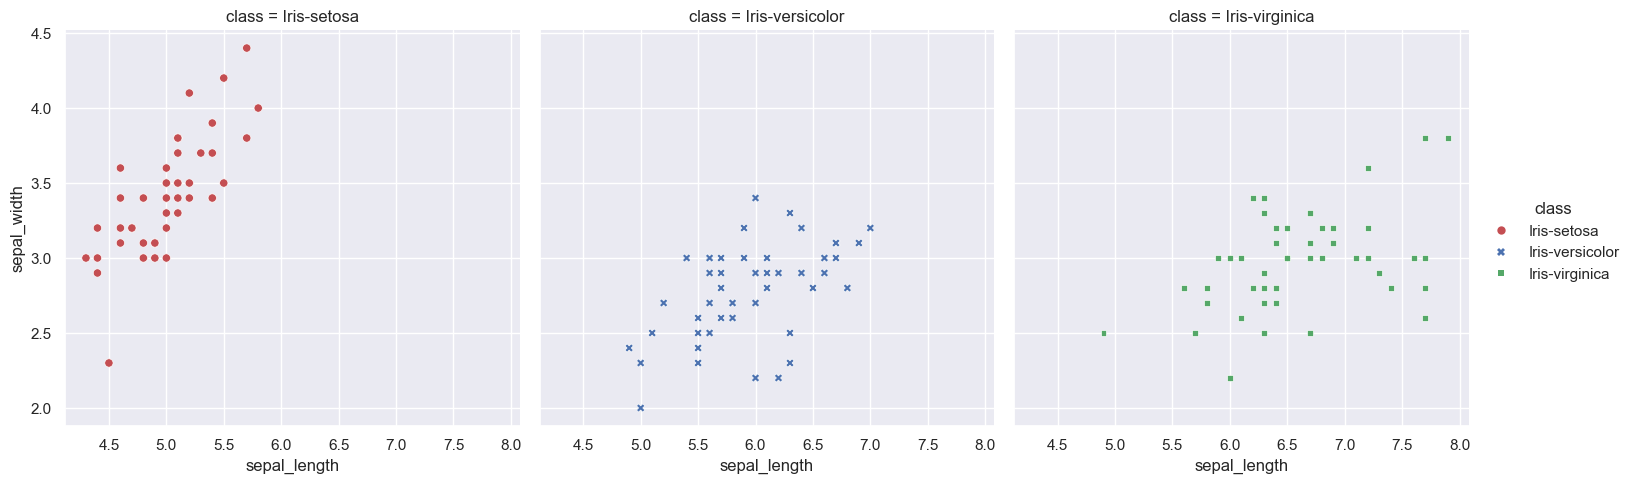

In [13]:
make_scatter_plots(df=iris_df, x='sepal_length', y='sepal_width')

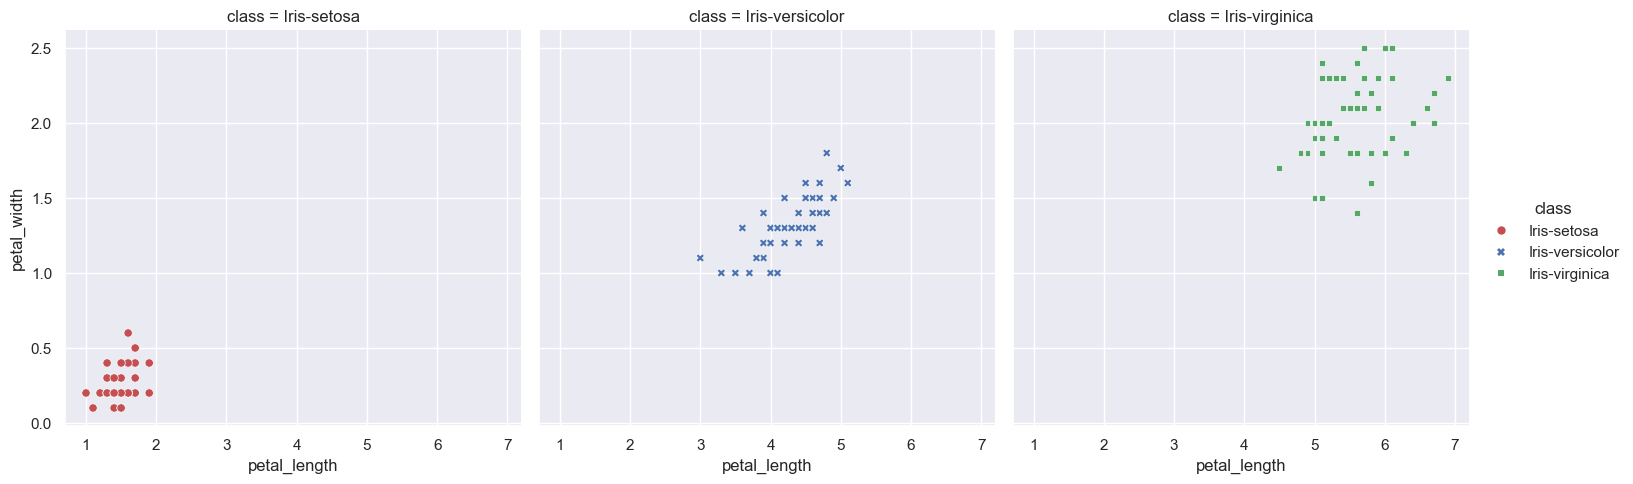

In [14]:
make_scatter_plots(df=iris_df, x='petal_length', y='petal_width')

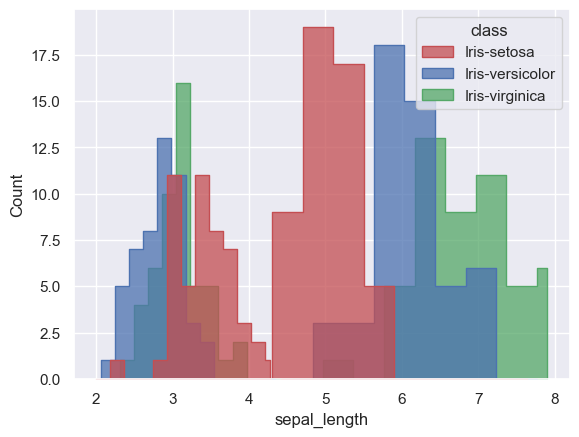

In [ ]:
make_histograms(df=iris_df, x='sepal_length')

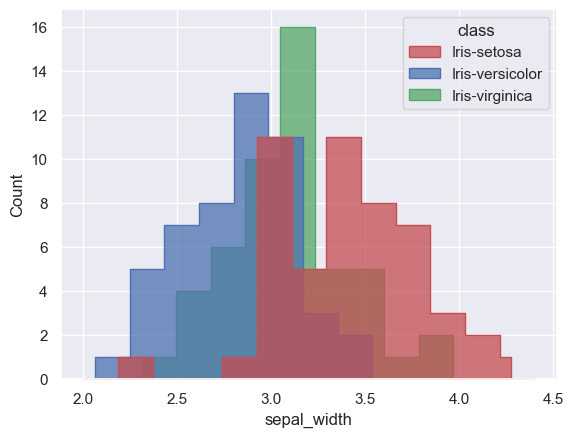

In [39]:
make_histograms(df=iris_df, x='sepal_width')

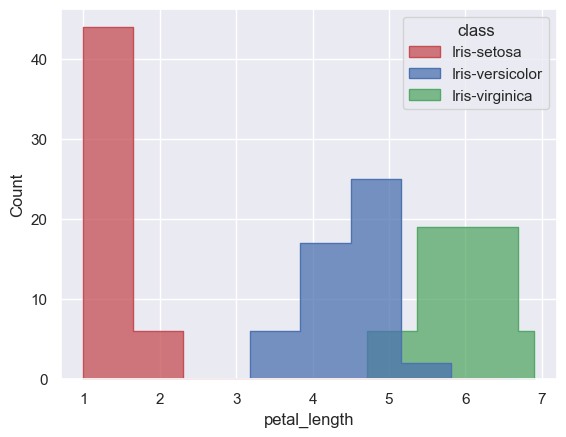

In [40]:
make_histograms(df=iris_df, x='petal_length')

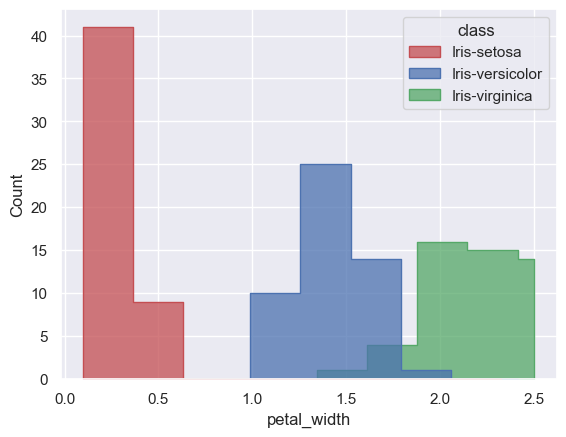

In [42]:
make_histograms(df=iris_df, x='petal_width')